# New York State Assembled Workers 

## Data Source
https://www.kaggle.com/new-york-state/nys-assembled-workers'-compensation-claims
https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu

OIICS Codes (appears version 1.01 used): <br>
https://wwwn.cdc.gov/wisards/oiics/Trees/MultiTree.aspx?Year=2007

Understanding the claims process: <br>
http://www.wcb.ny.gov/content/main/onthejob/HowSystemWorks.jsp


## Info about data from Kaggle:
Content<br>
The Workers’ Compensation Board (WCB) administers and regulates workers’ compensation benefits, disability benefits, volunteer firefighters’ benefits, volunteer ambulance workers’ benefits, and volunteer civil defense workers’ benefits. The WCB processes and adjudicates claims for benefits; ensures employer compliance with the requirement to maintain appropriate insurance coverage; and regulates the various system stakeholders, including self-insured employers, medical providers, third party administrators, insurance carriers and legal representatives. Claim assembly occurs when the WCB learns of a workplace injury and assigns the claim a WCB claim number. The WCB “assembles” a claim in which an injured worker has lost more than one week of work, has a serious injury that may result in a permanent disability, is disputed by the carrier or employer, or receives a claim form from the injured worker (Form C-3). A reopened claim is one that has been reactivated to resolve new issues following a finding that no further action was necessary<br>

Context<br>
This is a dataset hosted by the State of New York. The state has an open data platform found here and they update their information according the amount of data that is brought in. Explore New York State using Kaggle and all of the data sources available through the State of New York organization page!<br>

Update Frequency: This dataset is updated quarterly.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

% matplotlib inline

In [ ]:
data_path = 'nys-assembled-workers\'-compensation-claims/assembled-workers-compensation-claims-beginning-2000.csv'

parse_dates = ['Assembly Date', 'Accident Date', 'ANCR Date', 'Controverted Date', 'Section 32 Date', 
               'PPD Scheduled Loss Date', 'PPD Non-Scheduled Loss Date', 'PTD Date', 'First Appeal Date',
              'C-2 Date', 'C-3 Date', 'First Hearing Date']

df = pd.read_csv(data_path, parse_dates=parse_dates)   

# Change these object parameters into booleans
df['Accident'] = np.where(df['Accident'] == 'Y', 1, 0)
df['Occupational Disease'] = np.where(df['Occupational Disease'] == 'Y', 1, 0)
df['Attorney/Representative'] = np.where(df['Attorney/Representative'] == 'Y', 1, 0)

# UK is an abbreviation used for unknown, change to nan
df.loc[df['WCIO Part Of Body Code'] == 'UK'] = np.nan
df.loc[df['WCIO Nature of Injury Code'] == 'UK'] = np.nan
df.loc[df['WCIO Cause of Injury Code'] == 'UK'] = np.nan

df.loc[df['Gender'] == 'M'] = 1
df.loc[df['Gender'] == 'F'] = 0
df.loc[df['Gender'] == 'UK'] = np.nan

In [4]:
df.head()

,Claim Identifier,Claim Type,District Name,Average Weekly Wage,Current Claim Status,Claim Injury Type,Age at Injury,Assembly Date,Accident Date,ANCR Date,...,Hearing Count,Closed Count,Attorney/Representative,Carrier Name,Carrier Type,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease,County of Injury
0,4037088.0,Workers Compensation,BUFFALO,610.00,HEARING UNSET,PPD NSL,37.0,2015-06-30,2015-05-14,2015-10-29,...,11.0,5.0,1.0,UTICA MUTUAL INSURANCE CO,1A. PRIVATE,9.0,121.0,1.0,0.0,ERIE
1,4039191.0,Workers Compensation,ALBANY,215.88,NO FURTHER ACTION,PPD NSL,70.0,2015-07-10,2015-07-01,2015-11-12,...,6.0,4.0,1.0,STATE INSURANCE FUND,2A. SIF,8.0,125.0,1.0,0.0,ALBANY
2,4044565.0,Workers Compensation,NYC,530.72,NO FURTHER ACTION,PPD NSL,30.0,2015-07-13,2015-02-22,2016-03-09,...,7.0,5.0,1.0,STATE INSURANCE FUND,2A. SIF,3.0,240.0,1.0,0.0,WESTCHESTER
3,4054147.0,Workers Compensation,NYC,609.08,NO FURTHER ACTION,PPD NSL,63.0,2015-07-24,2015-04-10,2016-01-04,...,6.0,4.0,1.0,CHARTER OAK FIRE INS CO,1A. PRIVATE,9.0,164.0,1.0,0.0,QUEENS
4,4054674.0,Workers Compensation,NYC,400.00,NO FURTHER ACTION,PPD NSL,41.0,2015-07-31,2015-05-06,2016-01-28,...,7.0,5.0,1.0,SENTRY INSURANCE A MUTUAL CO,1A. PRIVATE,8.0,181.0,1.0,0.0,NASSAU


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3407610 entries, 0 to 3407609
Data columns (total 51 columns):
Claim Identifier                      float64
Claim Type                            object
District Name                         object
Average Weekly Wage                   float64
Current Claim Status                  object
Claim Injury Type                     object
Age at Injury                         float64
Assembly Date                         datetime64[ns]
Accident Date                         datetime64[ns]
ANCR Date                             datetime64[ns]
Controverted Date                     datetime64[ns]
Section 32 Date                       datetime64[ns]
PPD Scheduled Loss Date               datetime64[ns]
PPD Non-Scheduled Loss Date           datetime64[ns]
PTD Date                              datetime64[ns]
First Appeal Date                     datetime64[ns]
WCIO Part Of Body Code                object
WCIO Part Of Body Description         object
WC

In [6]:
df.describe()

,Claim Identifier,Average Weekly Wage,Age at Injury,Birth Year,Hearing Count,Closed Count,Attorney/Representative,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease
count,1.384912e+06,1.384912e+06,1.384912e+06,1.331423e+06,1.384912e+06,1.384912e+06,1.384912e+06,351723.000000,609294.000000,1.384912e+06,1.384912e+06
mean,3.612477e+06,3.436171e+02,2.211919e+01,9.548172e+02,1.188275e+00,1.765611e+00,2.763186e-01,4.729332,245.241809,9.878447e-01,1.215528e-02
std,1.243526e+06,3.005004e+03,2.414289e+01,9.839924e+02,2.980252e+00,2.343049e+00,4.471765e-01,4.986674,213.781075,1.095789e-01,1.095789e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,2.000000,0.000000e+00,0.000000e+00
25%,2.338640e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000,119.000000,1.000000e+00,0.000000e+00
50%,4.160064e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000,188.000000,1.000000e+00,0.000000e+00
75%,4.530493e+06,5.741300e+02,4.600000e+01,1.967000e+03,1.000000e+00,2.000000e+00,1.000000e+00,6.000000,301.000000,1.000000e+00,0.000000e+00
max,4.904281e+06,2.558346e+06,1.170000e+02,2.013000e+03,5.900000e+01,4.100000e+01,1.000000e+00,155.000000,6479.000000,1.000000e+00,1.000000e+00


Percentage of claims that are an accident: 40.15%.
Percentage of claims that are an occupational disease: 0.49%.


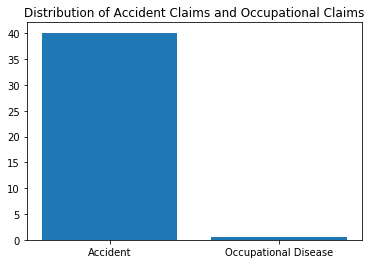

In [7]:
# Accidents vs occupational disease
perc_acc = df['Accident'].sum() / len(df['Accident']) * 100
perc_occ = df['Occupational Disease'].sum() / len(df['Occupational Disease']) * 100
print('Percentage of claims that are an accident: {:.2f}%.'.format(perc_acc))
print('Percentage of claims that are an occupational disease: {:.2f}%.'.format(perc_occ)) 
plt.bar(['Accident','Occupational Disease'], [perc_acc, perc_occ])
plt.title('Distribution of Accident Claims and Occupational Claims')
plt.show()

In [8]:
# Look at the different claim statuses
df['Current Claim Status'].unique()

array(['HEARING UNSET', 'NO FURTHER ACTION', 'HEARING SET', nan,
       'RE-OPENED ADMINISTRATIVELY', 'ADMINISTRATIVELY CLOSED',
       'MOTION SET', 'ARGUMENT SET', 'REFEREE - RESERVED DECISION',
       'NEWLY ASSEMBLED', 'CASE CANCELLED', 'RETURNED TO EXAMINING',
       'BOARD RESTORAL'], dtype=object)

In [9]:
plot_status = df.groupby(by='Current Claim Status')['Current Claim Status'].count()

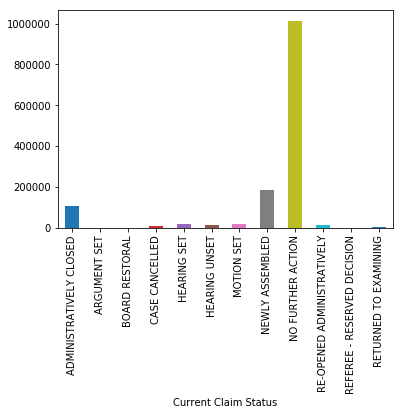

In [10]:
plot_status.plot.bar()

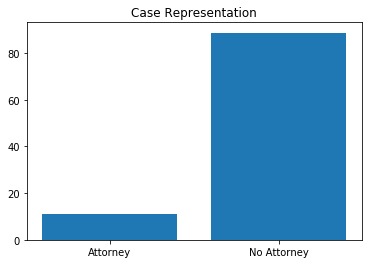

In [11]:
# Cases that are represented
perc_attorney = df['Attorney/Representative'].sum() / len(df['Attorney/Representative']) * 100
perc_none = 100 - perc_attorney
plt.bar(['Attorney','No Attorney'], [perc_attorney, perc_none])
plt.title('Case Representation')
plt.show()

In [12]:
# Claims subject to adjudication processes external to the Board - Y or N.
df['Alternative Dispute Resolution'].unique()

array(['N', nan, 'Y', 'R'], dtype=object)

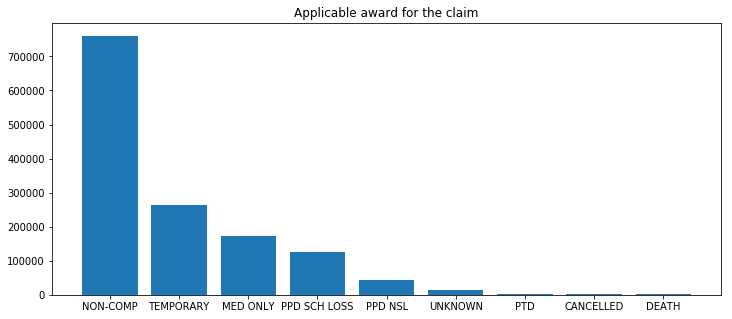

In [13]:
claim_plot = df.groupby(by='Claim Injury Type')['Claim Injury Type'].count()
claim_plot = claim_plot.sort_values(ascending=False)
plt.figure(figsize=(12, 5))
plt.bar(claim_plot.index, claim_plot)
plt.title('Applicable award for the claim')
plt.show()

In [14]:
# These cases had no hearing
df[df['Claim Injury Type'] == 'UNKNOWN'].describe()

,Claim Identifier,Average Weekly Wage,Age at Injury,Birth Year,Hearing Count,Closed Count,Attorney/Representative,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease
count,1.314400e+04,13144.0,13144.0,12872.0,13144.0,13144.000000,13144.0,73.000000,0.0,13144.0,13144.0
mean,3.795720e+06,0.0,0.0,0.0,0.0,0.747794,0.0,1.534247,NaN,1.0,0.0
std,8.467729e+05,0.0,0.0,0.0,0.0,0.434296,0.0,0.944019,NaN,0.0,0.0
min,1.360260e+05,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,NaN,1.0,0.0
25%,3.915025e+06,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,NaN,1.0,0.0
50%,4.142644e+06,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,NaN,1.0,0.0
75%,4.326128e+06,0.0,0.0,0.0,0.0,1.000000,0.0,2.000000,NaN,1.0,0.0
max,4.562463e+06,0.0,0.0,0.0,0.0,1.000000,0.0,5.000000,NaN,1.0,0.0


In [15]:
# These cases had no hearing
df[df['Claim Injury Type'] == 'NON-COMP'].head()

,Claim Identifier,Claim Type,District Name,Average Weekly Wage,Current Claim Status,Claim Injury Type,Age at Injury,Assembly Date,Accident Date,ANCR Date,...,Hearing Count,Closed Count,Attorney/Representative,Carrier Name,Carrier Type,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease,County of Injury
934,4039303.0,Workers Compensation,ALBANY,0.0,NO FURTHER ACTION,NON-COMP,50.0,2015-07-10,2015-06-14,NaT,...,1.0,1.0,1.0,"WAL-MART ASSOCIATES, INC.",4A. SELF PRIVATE,NaN,NaN,1.0,0.0,ALBANY
946,4054424.0,Workers Compensation,NYC,0.0,NO FURTHER ACTION,NON-COMP,61.0,2015-07-31,2015-01-01,NaT,...,1.0,1.0,1.0,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,NaN,NaN,1.0,0.0,KINGS
952,4039865.0,Workers Compensation,HAUPPAUGE,0.0,NO FURTHER ACTION,NON-COMP,34.0,2015-07-07,2015-06-16,NaT,...,0.0,1.0,1.0,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,1.0,NaN,1.0,0.0,SUFFOLK
957,4056211.0,Workers Compensation,ALBANY,0.0,NO FURTHER ACTION,NON-COMP,53.0,2015-07-28,2015-01-01,NaT,...,4.0,4.0,1.0,NEWBURGH ENLARGED CSD,3A. SELF PUBLIC,1.0,NaN,1.0,0.0,ORANGE
958,4053394.0,Workers Compensation,NYC,1651.8,NO FURTHER ACTION,NON-COMP,37.0,2015-07-20,2015-07-11,NaT,...,1.0,4.0,1.0,STATE INSURANCE FUND,2A. SIF,NaN,NaN,1.0,0.0,NASSAU


In [17]:
df[df['ANCR Date'].isnull()].count()

Claim Identifier                      775618
Claim Type                            775618
District Name                         775618
Average Weekly Wage                   775618
Current Claim Status                  775618
Claim Injury Type                     775618
Age at Injury                         775618
Assembly Date                         775618
Accident Date                         775024
ANCR Date                                  0
Controverted Date                      24156
Section 32 Date                           83
PPD Scheduled Loss Date                    0
PPD Non-Scheduled Loss Date                0
PTD Date                                   0
First Appeal Date                       3707
WCIO Part Of Body Code                775618
WCIO Part Of Body Description         775618
WCIO Nature of Injury Code            775618
WCIO Nature of Injury Description     775618
WCIO Cause of Injury Code             775618
WCIO Cause of Injury Description      775618
OIICS Part

In [18]:
df['WCIO Part Of Body Code'].unique()

array(['42', '20', '90', '65', nan, '33', '18', '19', '38', '41', '25',
       '30', '43', '52', '23', '63', '56', '55', '53', '15', '40', '34',
       '48', '35', '54', '32', '31', '11', '36', '10', '22', '50', '13',
       '14', '99', '61', '45', '44', '51', '37', '12', '21', '66', '49',
       '39', '62', '58', '17', '46', '91', '16', '57', '47', '60', '24',
       '26', '64'], dtype=object)

In [19]:
df['WCIO Nature of Injury Code'].unique()

array(['59', '52', '10', '90', '49', nan, '28', '34', '16', '80', '78',
       '40', '37', '07', '31', '13', '66', '58', '47', '19', '72', '46',
       '74', '71', '43', '77', '03', '02', '25', '68', '01', '04', '36',
       '73', '30', '41', '53', '91', '64', '55', '65', '69', '61', '42',
       '32', '79', '60', '54', '75', '22', '70', '67', '62', '76', '63'],
      dtype=object)

In [20]:
df['WCIO Cause of Injury Code'].unique()

array(['75', '55', '99', '56', '66', '60', '31', '45', nan, '33', '29',
       '50', '57', '30', '89', '79', '81', '58', '74', '26', '25', '77',
       '53', '78', '68', '97', '80', '46', '98', '12', '16', '82', '20',
       '52', '13', '76', '85', '27', '32', '18', '48', '28', '65', '19',
       '09', '70', '54', '10', '59', '94', '91', '84', '87', '90', '15',
       '11', '17', '04', '02', '08', '01', '69', '05', '61', '14', '06',
       '07', '95', '03', '86', '47', '67', '41', '93', '40', '96', '88'],
      dtype=object)

In [21]:
df['OIICS Part Of Body Code'].unique()

array([nan, '23*', '5', '34', '8', '28', '41*', '38*', '24*', '31*',
       '48*', '21', '01*', '33', '42', '10', '32', '43*', '22*', '00',
       '03*', '99*', '09', '25*', '02', '44', '20', '13', '08', '91',
       '30', '40', '49', '29', '39', '14', '12', '15'], dtype=object)

In [22]:
# Astericks mean there are items further down the decision tree
df['OIICS Injury Source Code'].unique()

array([nan, '11*', '41*', '57*', '52*', '82*', '23*', '00', '30', '62*',
       '84*', '32*', '10', '35*', '33*', '56*', '63*', '58*', '72*', '16',
       '98', '37*', '46*', '86*', '85*', '79*', '71*', '34*', '96*', '70',
       '73*', '64*', '51*', '78*', '13*', '83*', '42*', '21*', '60',
       '88*', '44*', '39*', '48*', '53*', '15*', '09*', '40', '55*',
       '22*', '99*', '87*', '92*', '91*', '14*', '49', '95*', '75*',
       '36*', '47*', '93*', '05*', '07*', '74*', '24*', '12*', '02*',
       '19', '81*', '31*', '80', '45*', '94*', '29', '76*', '54*', '04*',
       '77*', '20', '03*', '43*', '89', '08*', '01*', '06*', '69', '59',
       '61*'], dtype=object)

In [23]:
df['OIICS Event Exposure Code'].unique()

array([nan, '22*', '11*', '41*', '34*', '03*', '13*', '42*', '01*', '02*',
       '61*', '21*', '43*', '23*', '32*', '45*', '52*', '29', '99*', '20',
       '25', '40', '35*', '51*', '12*', '37', '06*', '46*', '63*', '31*',
       '05*', '10', '00', '38*', '44*', '39', '04*', '36*', '50', '49',
       '62*', '33*', '09', '30', '19', '60', '24'], dtype=object)

In [24]:
df['OIICS Secondary Source Code'].unique()

array([nan, '11*', '16', '79*', '33*', '82*', '57*', '00', '30', '98',
       '62*', '23*', '71*', '41*', '52*', '95*', '73*', '96*', '93*',
       '48*', '72*', '63*', '24*', '74*', '56*', '92*', '34*', '78*',
       '37*', '70', '85*', '36*', '51*', '13*', '60', '64*', '32*', '88*',
       '44*', '21*', '39*', '35*', '22*', '31*', '46*', '99*', '03*',
       '86*', '09*', '42*', '55*', '47*', '87*', '14*', '94*', '75*',
       '08*', '05*', '07*', '12*', '69', '02*', '15*', '19', '10', '81*',
       '58*', '80', '45*', '49', '77*', '29', '40', '76*', '83*', '54*',
       '04*', '84*', '53*', '89', '91*', '43*', '01*', '06*', '20', '61*',
       '59'], dtype=object)

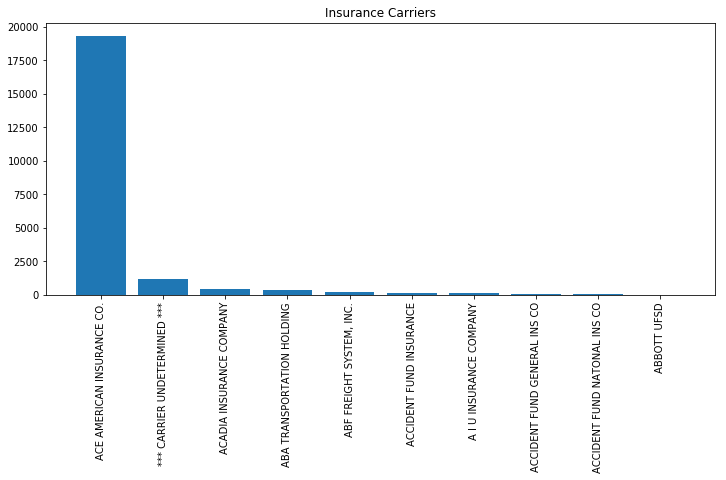

In [28]:
carrier_plot = df.groupby(by='Carrier Name')['Carrier Name'].count()
carrier_plot = carrier_plot[:10].sort_values(ascending=False)
plt.figure(figsize=(12, 5))
plt.bar(carrier_plot.index, carrier_plot)
plt.xticks(rotation=90)
plt.title('Insurance Carriers')
plt.show()

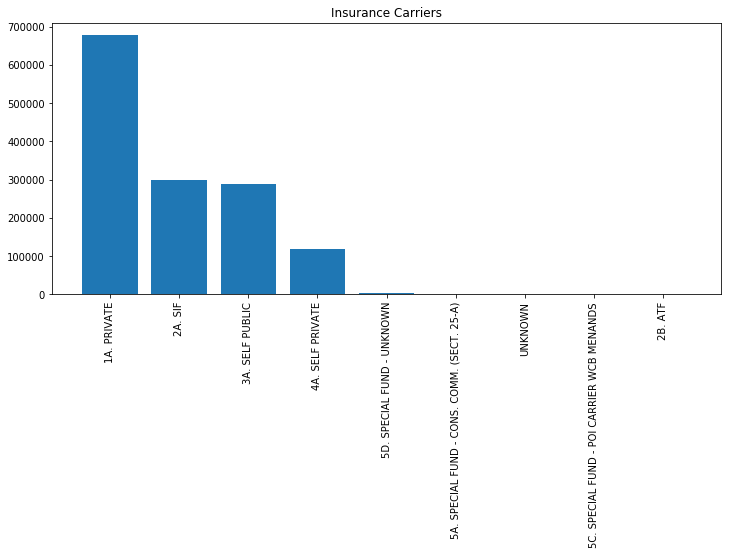

In [30]:
ins_types_plot = df.groupby(by='Carrier Type')['Carrier Type'].count()
ins_types_plot = ins_types_plot.sort_values(ascending=False)
plt.figure(figsize=(12, 5))
plt.bar(ins_types_plot.index, ins_types_plot)
plt.title('Insurance Carriers')
plt.xticks(rotation=90)
plt.show()

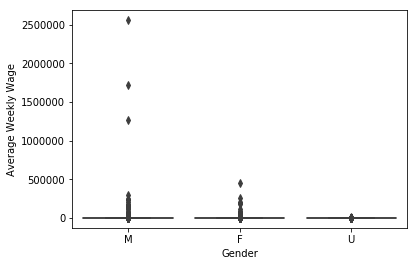

In [32]:
# Look at the gender distribution and wages
sns.boxplot(x='Gender', y='Average Weekly Wage', data=df)


In [40]:
df[df['Average Weekly Wage'] > 20000]

,Claim Identifier,Claim Type,District Name,Average Weekly Wage,Current Claim Status,Claim Injury Type,Age at Injury,Assembly Date,Accident Date,ANCR Date,...,Hearing Count,Closed Count,Attorney/Representative,Carrier Name,Carrier Type,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease,County of Injury
2715,4040929.0,Workers Compensation,NYC,457060.00,NO FURTHER ACTION,MED ONLY,31.0,2015-06-30,2014-07-06,2015-10-30,...,0.0,1.0,0.0,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,NaN,122.0,1.0,0.0,QUEENS
23975,4097439.0,Workers Compensation,ROCHESTER,23788.17,NO FURTHER ACTION,MED ONLY,41.0,2015-09-18,2015-09-15,2018-02-09,...,0.0,1.0,0.0,"ROCHESTER, UNIVERSITY OF",4A. SELF PRIVATE,NaN,875.0,1.0,0.0,MONROE
44487,4115091.0,Workers Compensation,HAUPPAUGE,226149.00,NO FURTHER ACTION,TEMPORARY,42.0,2015-10-12,2015-10-03,2017-09-20,...,0.0,1.0,0.0,COUNTY OF NASSAU,3A. SELF PUBLIC,NaN,709.0,1.0,0.0,SUFFOLK
44535,4087189.0,Workers Compensation,NYC,93004.46,NO FURTHER ACTION,TEMPORARY,62.0,2015-08-26,2015-08-24,2015-10-26,...,0.0,1.0,1.0,STATE INSURANCE FUND,2A. SIF,1.0,61.0,1.0,0.0,NASSAU
50776,4102117.0,Workers Compensation,NYC,181677.00,NO FURTHER ACTION,PPD SCH LOSS,54.0,2015-09-11,2015-08-21,2016-02-17,...,0.0,4.0,1.0,ARCH INDEMNITY INSURANCE CO.,1A. PRIVATE,4.0,159.0,1.0,0.0,RICHMOND
74178,4152675.0,Workers Compensation,NYC,41266.44,NO FURTHER ACTION,PPD SCH LOSS,54.0,2015-11-13,2015-10-30,2018-01-03,...,0.0,2.0,1.0,FEDERAL INSURANCE COMPANY,1A. PRIVATE,NaN,782.0,1.0,0.0,NEW YORK
172242,4201155.0,Workers Compensation,NYC,252539.00,NO FURTHER ACTION,PPD SCH LOSS,47.0,2016-01-26,2016-01-14,2018-05-21,...,1.0,2.0,1.0,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,1.0,846.0,1.0,0.0,KINGS
173699,4194613.0,Workers Compensation,NYC,25280.00,NO FURTHER ACTION,MED ONLY,49.0,2016-01-19,2016-01-05,2017-10-18,...,0.0,1.0,0.0,WANTAGH UFSD,3A. SELF PUBLIC,NaN,638.0,1.0,0.0,NASSAU
174599,4215915.0,Workers Compensation,NYC,81081.00,NO FURTHER ACTION,MED ONLY,55.0,2016-02-11,2016-02-04,2017-01-25,...,0.0,1.0,0.0,COUNTY OF NASSAU,3A. SELF PUBLIC,NaN,349.0,1.0,0.0,NASSAU
175674,4231367.0,Workers Compensation,NYC,1717087.00,NO FURTHER ACTION,TEMPORARY,44.0,2016-03-02,2016-02-25,2016-07-08,...,0.0,1.0,0.0,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,NaN,128.0,1.0,0.0,QUEENS


In [35]:
df['Average Weekly Wage'].mean()

343.61712180990565

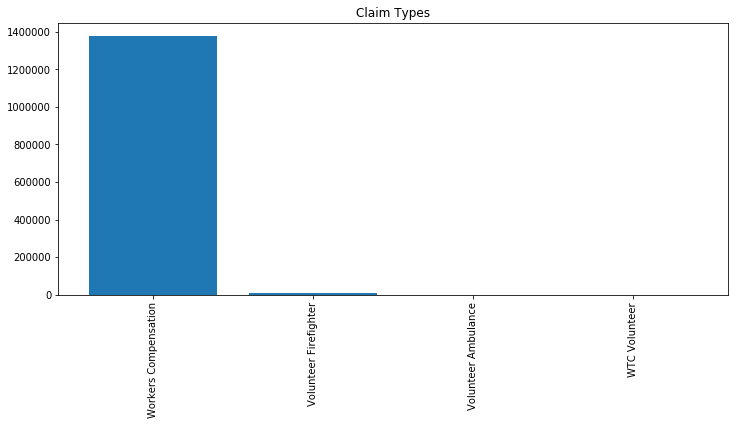

In [38]:
claim_type_plot = df.groupby(by='Claim Type')['Claim Type'].count()
claim_type_plot = claim_type_plot.sort_values(ascending=False)
plt.figure(figsize=(12, 5))
plt.bar(claim_type_plot.index, claim_type_plot)
plt.title('Claim Types')
plt.xticks(rotation=90)
plt.show()

In [97]:
# Limit analysis to workers compensation claims
df = df[df['Claim Type'] == 'Workers Compensation']

# Remove outlier salaries, some may be errors
df = df[df['Average Weekly Wage'] < 20000]

# Create some features on insurance carrier
df['Private Ins'] = np.where(df['Carrier Type'] == '1A. PRIVATE', 1, 0)
df['SIF InS'] = np.where(df['Carrier Type'] == '2A. SIF', 1, 0)
df['Self Public Ins'] = np.where(df['Carrier Type'] == '3A. SELF PUBLIC', 1, 0)
df['Self Private Ins'] = np.where(df['Carrier Type'] == '4A. SELF PRIVATE', 1, 0)
df['MedRegion1'] = np.where(df['Medical Fee Region'] == 'I', 1, 0)
df['MedRegion2'] = np.where(df['Medical Fee Region'] == 'II', 1, 0)
df['MedRegion3'] = np.where(df['Medical Fee Region'] == 'III', 1, 0)
df['MedRegion4'] = np.where(df['Medical Fee Region'] == 'IV', 1, 0)

# Fix this - there are also unknown genders
df['Gender'] = np.where(df['Gender'] == 'M', 1, 0)

df['WCIO Part Of Body Code'] = pd.to_numeric(df['WCIO Part Of Body Code'])
df['WCIO Nature of Injury Code'] = pd.to_numeric(df['WCIO Nature of Injury Code'])
df['WCIO Cause of Injury Code'] = pd.to_numeric(df['WCIO Cause of Injury Code '])

# There are also impossibly old people in the dataset...

/usr/local/lib/python3.7/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [44]:
carrier_plot

Carrier Name
ACE AMERICAN INSURANCE CO.      19336
*** CARRIER UNDETERMINED ***     1147
ACADIA INSURANCE COMPANY          430
ABA TRANSPORTATION HOLDING        336
ABF FREIGHT SYSTEM, INC.          189
ACCIDENT FUND INSURANCE           110
A I U INSURANCE COMPANY            91
ACCIDENT FUND GENERAL INS CO       31
ACCIDENT FUND NATONAL INS CO       14
ABBOTT UFSD                         2
Name: Carrier Name, dtype: int64

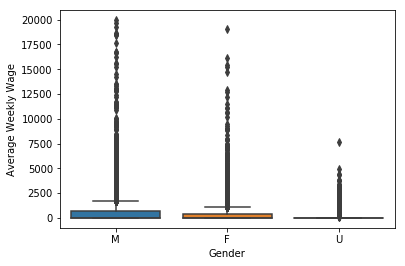

In [47]:
# Look at the gender distribution and wages
sns.boxplot(x='Gender', y='Average Weekly Wage', data=df)

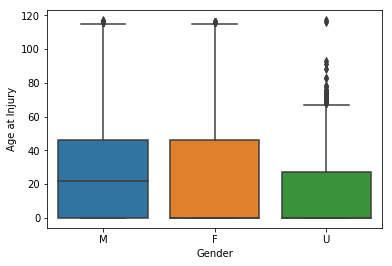

In [48]:
# Look at the gender distribution and Age
sns.boxplot(x='Gender', y='Age at Injury', data=df)

In [53]:
df[df['Age at Injury'] > 100]['Birth Year']

69494      1900.0
128462     1901.0
130388     1900.0
153183     1900.0
157509     1900.0
161104     1913.0
174152     1900.0
190666     1900.0
190757     1900.0
199649     1900.0
208998     1901.0
210086     1901.0
230564     1900.0
256339     1901.0
315592     1900.0
323504     1900.0
354078     1900.0
362699     1901.0
372221     1901.0
376770     1900.0
429313     1901.0
439765     1901.0
446894     1901.0
451303     1901.0
2381157    1901.0
2514368    1911.0
2522349       NaN
2689718    1911.0
2713929    1901.0
2802506    1901.0
            ...  
3113957    1901.0
3121905    1901.0
3122482    1901.0
3122629    1901.0
3122658    1901.0
3122861    1901.0
3124810    1901.0
3126751    1900.0
3136215    1901.0
3139490    1901.0
3145005    1901.0
3149252    1901.0
3149780    1901.0
3156132    1901.0
3161358    1901.0
3161989    1901.0
3169207    1901.0
3171189    1901.0
3173819    1901.0
3174455    1901.0
3176242    1901.0
3193879    1901.0
3196835    1901.0
3198832       NaN
3203255   

These ages seem unlikely

In [84]:
features = ['Average Weekly Wage', 
       'Age at Injury', 'WCIO Part Of Body Code',
       'WCIO Nature of Injury Code', 'WCIO Cause of Injury Code', 
       'Gender','Zip Code', 'MedRegion1', 'MedRegion2', 'MedRegion3', 'MedRegion4', 
       'Attorney/Representative', 
       'IME-4 Count', 'Interval Assembled to ANCR', 'Accident',
       'Occupational Disease', 'Private Ins', 'SIF InS',
       'Self Public Ins', 'Self Private Ins']

In [64]:
df['is_controverted'] = np.where(df['Controverted Date'].isnull() == 1, 0, 1)

In [68]:
df['is_controverted'].sum()/len(df['is_controverted'])

0.049696398599164845

If looking for a controverted data set, it is an unbalanced data set.

In [67]:
df[['is_controverted', 'Controverted Date']].head(10)

,is_controverted,Controverted Date
0,0,NaT
1,0,NaT
2,0,NaT
3,1,2015-08-06
4,0,NaT
5,0,NaT
6,0,NaT
7,1,2015-08-21
8,0,NaT
9,0,NaT


In [92]:
X = df[features]
y = df['is_controverted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [93]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)


ValueError: could not convert string to float: 'L2M 2'

In [87]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377464 entries, 0 to 3407609
Data columns (total 20 columns):
Average Weekly Wage           1377464 non-null float64
Age at Injury                 1377464 non-null float64
WCIO Part Of Body Code        1377464 non-null object
WCIO Nature of Injury Code    1377464 non-null object
WCIO Cause of Injury Code     1377464 non-null object
Gender                        1377464 non-null object
Zip Code                      1377464 non-null object
MedRegion1                    1377464 non-null int64
MedRegion2                    1377464 non-null int64
MedRegion3                    1377464 non-null int64
MedRegion4                    1377464 non-null int64
Attorney/Representative       1377464 non-null float64
IME-4 Count                   350550 non-null float64
Interval Assembled to ANCR    606431 non-null float64
Accident                      1377464 non-null float64
Occupational Disease          1377464 non-null float64
Private Ins           

In [76]:
df['Medical Fee Region'].unique()

array(['II', 'III', 'IV', 'I', 'UK'], dtype=object)

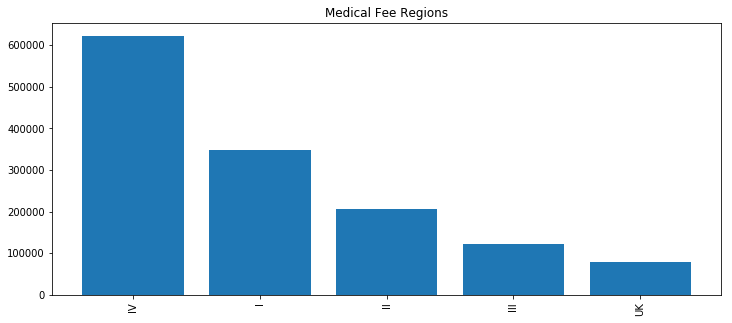

In [77]:
med_region_plot = df.groupby(by='Medical Fee Region')['Medical Fee Region'].count()
med_region_plot = med_region_plot.sort_values(ascending=False)
plt.figure(figsize=(12, 5))
plt.bar(med_region_plot.index, med_region_plot)
plt.title('Medical Fee Regions')
plt.xticks(rotation=90)
plt.show()

In [98]:
df[features].head()

,Average Weekly Wage,Age at Injury,WCIO Part Of Body Code,WCIO Nature of Injury Code,WCIO Cause of Injury Code,Gender,Zip Code,MedRegion1,MedRegion2,MedRegion3,MedRegion4,Attorney/Representative,IME-4 Count,Interval Assembled to ANCR,Accident,Occupational Disease,Private Ins,SIF InS,Self Public Ins,Self Private Ins
0,610.00,37.0,42,59,75,1,14201,0,1,0,0,1.0,9.0,121.0,1.0,0.0,1,0,0,0
1,215.88,70.0,20,52,75,0,12205,0,1,0,0,1.0,8.0,125.0,1.0,0.0,0,1,0,0
2,530.72,30.0,42,52,55,0,10701,0,0,1,0,1.0,3.0,240.0,1.0,0.0,0,1,0,0
3,609.08,63.0,42,59,99,1,11355,0,0,0,1,1.0,9.0,164.0,1.0,0.0,1,0,0,0
4,400.00,41.0,42,52,56,0,11735,0,0,0,1,1.0,8.0,181.0,1.0,0.0,1,0,0,0


In [88]:
df['Gender'].unique()

array(['M', 'F', 'U'], dtype=object)